In [1]:
#Setting up
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv(r"C:\Users\PV\OneDrive\Documents\School\Summer 2021-2022\Programming for Data Science and Visualization\Datasets\History of Mass Shootings\History_of_Mass_Shootings_in_the_USA.csv")

## Explore the Dataset

In [2]:
#checking if the import is correct (it is)
data.head(10)

,Date,City,State,Dead,Injured,Total,Description
0,2022-07-07,Chicago,Illinois,0,4,4,Four people were wounded in a drive-by shootin...
1,2022-07-06,Tampa,Florida,0,4,4,Four people were shot at an intersection in th...
2,2022-07-06,Chicago,Illinois,0,4,4,Four people were shot after three men got out ...
3,2022-07-06,St. Cloud,Minnesota,0,4,4,An argument in an alleyway escalated into a sh...
4,2022-07-05,Youngstown,Ohio,1,3,4,"Four people were shot, one fatally, in the par..."
5,2022-07-05,Gary,Indiana,3,7,10,Shortly after midnight three people were kille...
6,2022-07-05,Steubenville,Ohio,0,4,4,A shooting inside a nightclub left four injured.
7,2022-07-05,Rochester,New York,1,3,4,Several people opened fire on a crowd of peopl...
8,2022-07-04,Shreveport,Louisiana,1,3,4,Three vehicles engaged in a running gun battle...
9,2022-07-04,Highland Park,Illinois,7,25,32,Highland Park parade shooting: Seven people we...


In [3]:
#viewing data columns & checking for Null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2647 entries, 0 to 2646
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2647 non-null   object
 1   City         2647 non-null   object
 2   State        2642 non-null   object
 3   Dead         2647 non-null   int64 
 4   Injured      2647 non-null   int64 
 5   Total        2647 non-null   int64 
 6   Description  2647 non-null   object
dtypes: int64(3), object(4)
memory usage: 144.9+ KB


We can deduct two things from the previous operation:
- The dataset contains the date, city and state, the fatality (including deaths, injuries and the total) as well as the general descriptions of about 2647 shootings in the US.
- The State column contains 5 null values

In [4]:
#Examining the Null
print(data.loc[data['State'].isnull() , :])

            Date                          City State  Dead  Injured  Total  \
2499  2013-09-16               Washington D.C.   NaN    13        8     21   
2503  2013-03-13  Mohawk and Herkimer New York   NaN     5        2      7   
2609  1981-03-30               Washington D.C.   NaN     1        3      4   
2622  1973-01-18               Washington D.C.   NaN     7        2      9   
2637  1954-03-01               Washington D.C.   NaN     0        5      5   

                                            Description  
2499  Washington Navy Yard shooting: A gunman entere...  
2503  Herkimer County shootings A man set fire to hi...  
2609  Attempted assassination of Ronald Reagan: John...  
2622  Hanafi Murders: Three individuals were shot an...  
2637  1954 United States Capitol Shooting Incident: ...  


In [5]:
#manually filling in the Null values (adapted from: https://www.kaggle.com/code/daewogibran/simple-eda)
data.loc[(data['City'] == 'Washington D.C.') & (data['State'].isnull()), 'State'] = 'Washington D.C.'
data.loc[(data['City'] == 'Mohawk and Herkimer New York') & (data['State'].isnull()), 'State'] = 'New York'

In [6]:
#checking data type of each column
data.dtypes

Date           object
City           object
State          object
Dead            int64
Injured         int64
Total           int64
Description    object
dtype: object

In [7]:
#creating time variables (adapted from: https://www.kaggle.com/code/abdullahsangha/mass-shootings-eda-areas-to-improve-on)
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['day_of_week'] = data['Date'].dt.day_name()

In [8]:
#create a new variable: fatality_rate
data['Fatality Rate'] = data['Dead'] / data['Total']
fatality_rate = data['Fatality Rate']
fatality_rate

0       0.000
1       0.000
2       0.000
3       0.000
4       0.250
        ...  
2642    0.625
2643    1.000
2644    1.000
2645    1.000
2646    1.000
Name: Fatality Rate, Length: 2647, dtype: float64

In [9]:
data.head(10)

,Date,City,State,Dead,Injured,Total,Description,year,month,day,day_of_week,Fatality Rate
0,2022-07-07,Chicago,Illinois,0,4,4,Four people were wounded in a drive-by shootin...,2022,7,7,Thursday,0.00000
1,2022-07-06,Tampa,Florida,0,4,4,Four people were shot at an intersection in th...,2022,7,6,Wednesday,0.00000
2,2022-07-06,Chicago,Illinois,0,4,4,Four people were shot after three men got out ...,2022,7,6,Wednesday,0.00000
3,2022-07-06,St. Cloud,Minnesota,0,4,4,An argument in an alleyway escalated into a sh...,2022,7,6,Wednesday,0.00000
4,2022-07-05,Youngstown,Ohio,1,3,4,"Four people were shot, one fatally, in the par...",2022,7,5,Tuesday,0.25000
5,2022-07-05,Gary,Indiana,3,7,10,Shortly after midnight three people were kille...,2022,7,5,Tuesday,0.30000
6,2022-07-05,Steubenville,Ohio,0,4,4,A shooting inside a nightclub left four injured.,2022,7,5,Tuesday,0.00000
7,2022-07-05,Rochester,New York,1,3,4,Several people opened fire on a crowd of peopl...,2022,7,5,Tuesday,0.25000
8,2022-07-04,Shreveport,Louisiana,1,3,4,Three vehicles engaged in a running gun battle...,2022,7,4,Monday,0.25000
9,2022-07-04,Highland Park,Illinois,7,25,32,Highland Park parade shooting: Seven people we...,2022,7,4,Monday,0.21875


In [10]:
#recheck the null values
data.isnull().sum()

Date             0
City             0
State            0
Dead             0
Injured          0
Total            0
Description      0
year             0
month            0
day              0
day_of_week      0
Fatality Rate    0
dtype: int64

## Exploratory Data Analysis

In [11]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [12]:
title_font = {'family' : 'DejaVu Sans', 'color' : 'black', 'size' : 25 }

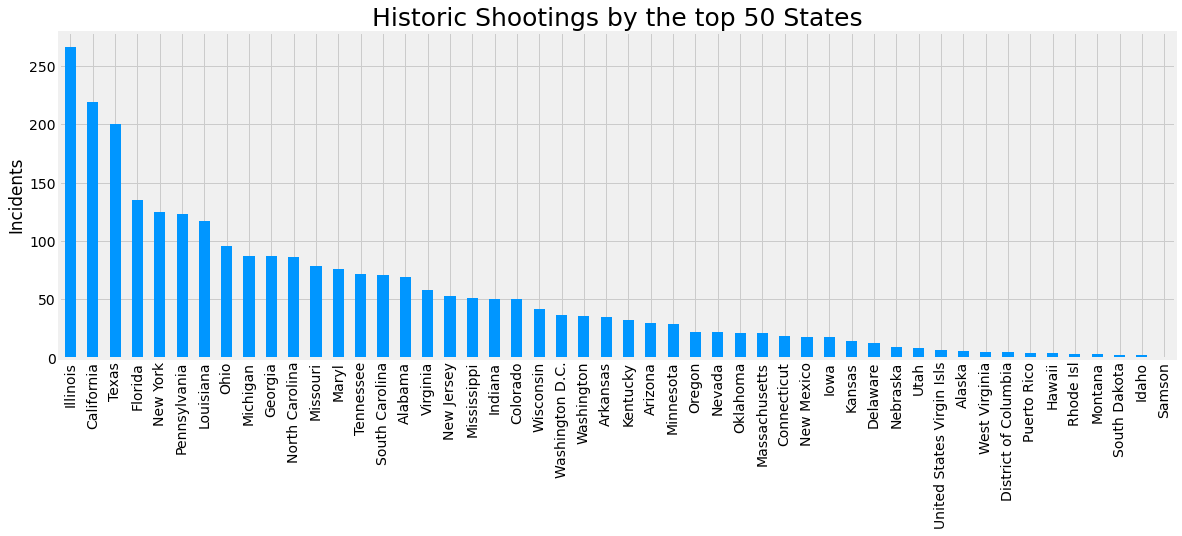

In [13]:
#shootings by state
shootings_by_state = data['State'].value_counts().head(50)  #after Idaho (number 49), the number of shootings is negligible

plt.figure(figsize= (20,6))
plt.style.use('fivethirtyeight')
shootings_by_state.plot(kind = 'bar', color = '#0096FF')


plt.title('Historic Shootings by the top 50 States', fontdict= title_font)
plt.ylabel('Incidents')

plt.show()
#I decide not to add x-label

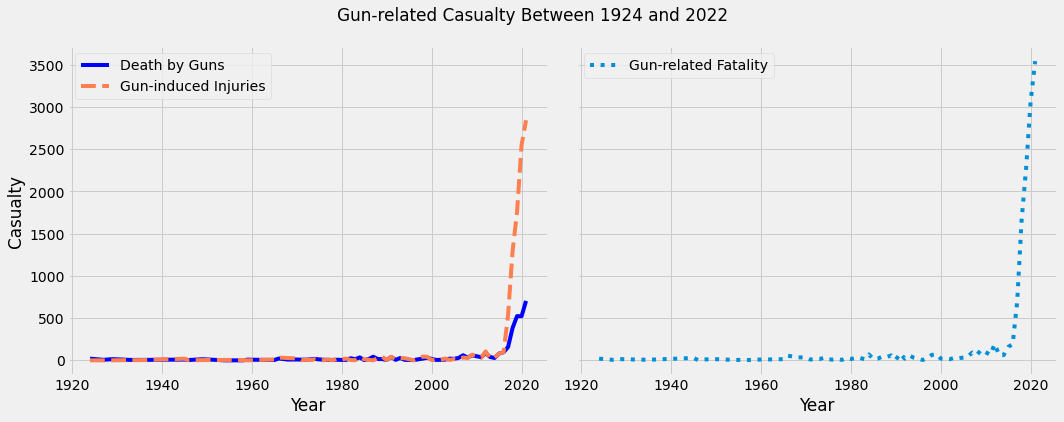

In [14]:
#number of death, injured and total by year
# In previous attempts to plot this, I notice that the value of 2022 drastically decreases. This is probably because we are only in July 2022 so I remove it.


death_by_year = data['Dead'].groupby(data['year']).sum()
inju_by_year = data['Injured'].groupby(data['year']).sum()
fata_by_year = data['Total'].groupby(data['year']).sum()


fig1 = plt.figure(figsize= (15,6))
plt.title('Gun-related Fatality Between 1924 and 2022', loc = 'center')

ax1 = plt.subplot(1,2,1)
death_by_year[death_by_year.index < 2022].plot(kind = 'line', label = 'Death by Guns', color = 'b') 
inju_by_year[inju_by_year.index < 2022].plot(kind = 'line', linestyle ='--', color = 'Coral', label = 'Gun-induced Injuries') 
ax1.set_xlabel('Year')
ax1.set_ylabel ('Casualty')
plt.legend( loc = 'upper left')


ax2 = plt.subplot(1,2,2, sharey = ax1)
fata_by_year[fata_by_year.index < 2022].plot(kind = 'line', linestyle = ':', label = 'Gun-related Fatality')
ax2.set_xlabel('Year')
plt.legend()

fig1.suptitle('Gun-related Casualty Between 1924 and 2022', fontdict = title_font)
fig1.tight_layout()

plt.show()



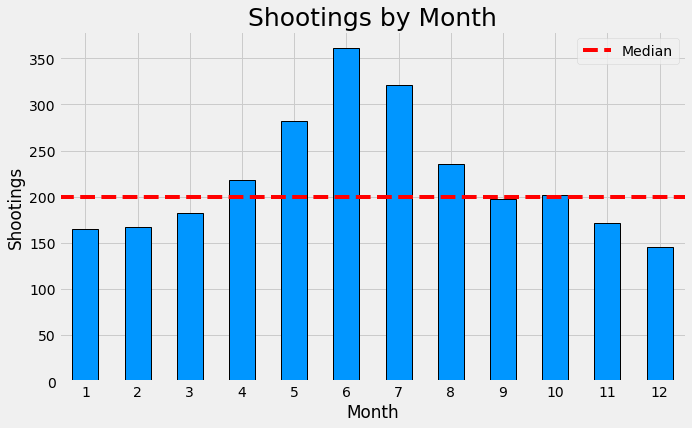

In [15]:
#shootings by month

df = data['month'].value_counts().sort_index(ascending = True) #counting the number of shootings per months then 

plt.figure(figsize = (10,6))
df.plot(kind = 'bar', edgecolor = 'k', linewidth = 1, label = '', rot = 0, color = '#0096FF')
plt.axhline(df.median(), ls = "--", color = 'r', label = 'Median')


plt.xlabel('Month')
plt.ylabel('Shootings')
plt.title('Shootings by Month', fontdict= title_font)
plt.legend()

plt.show()


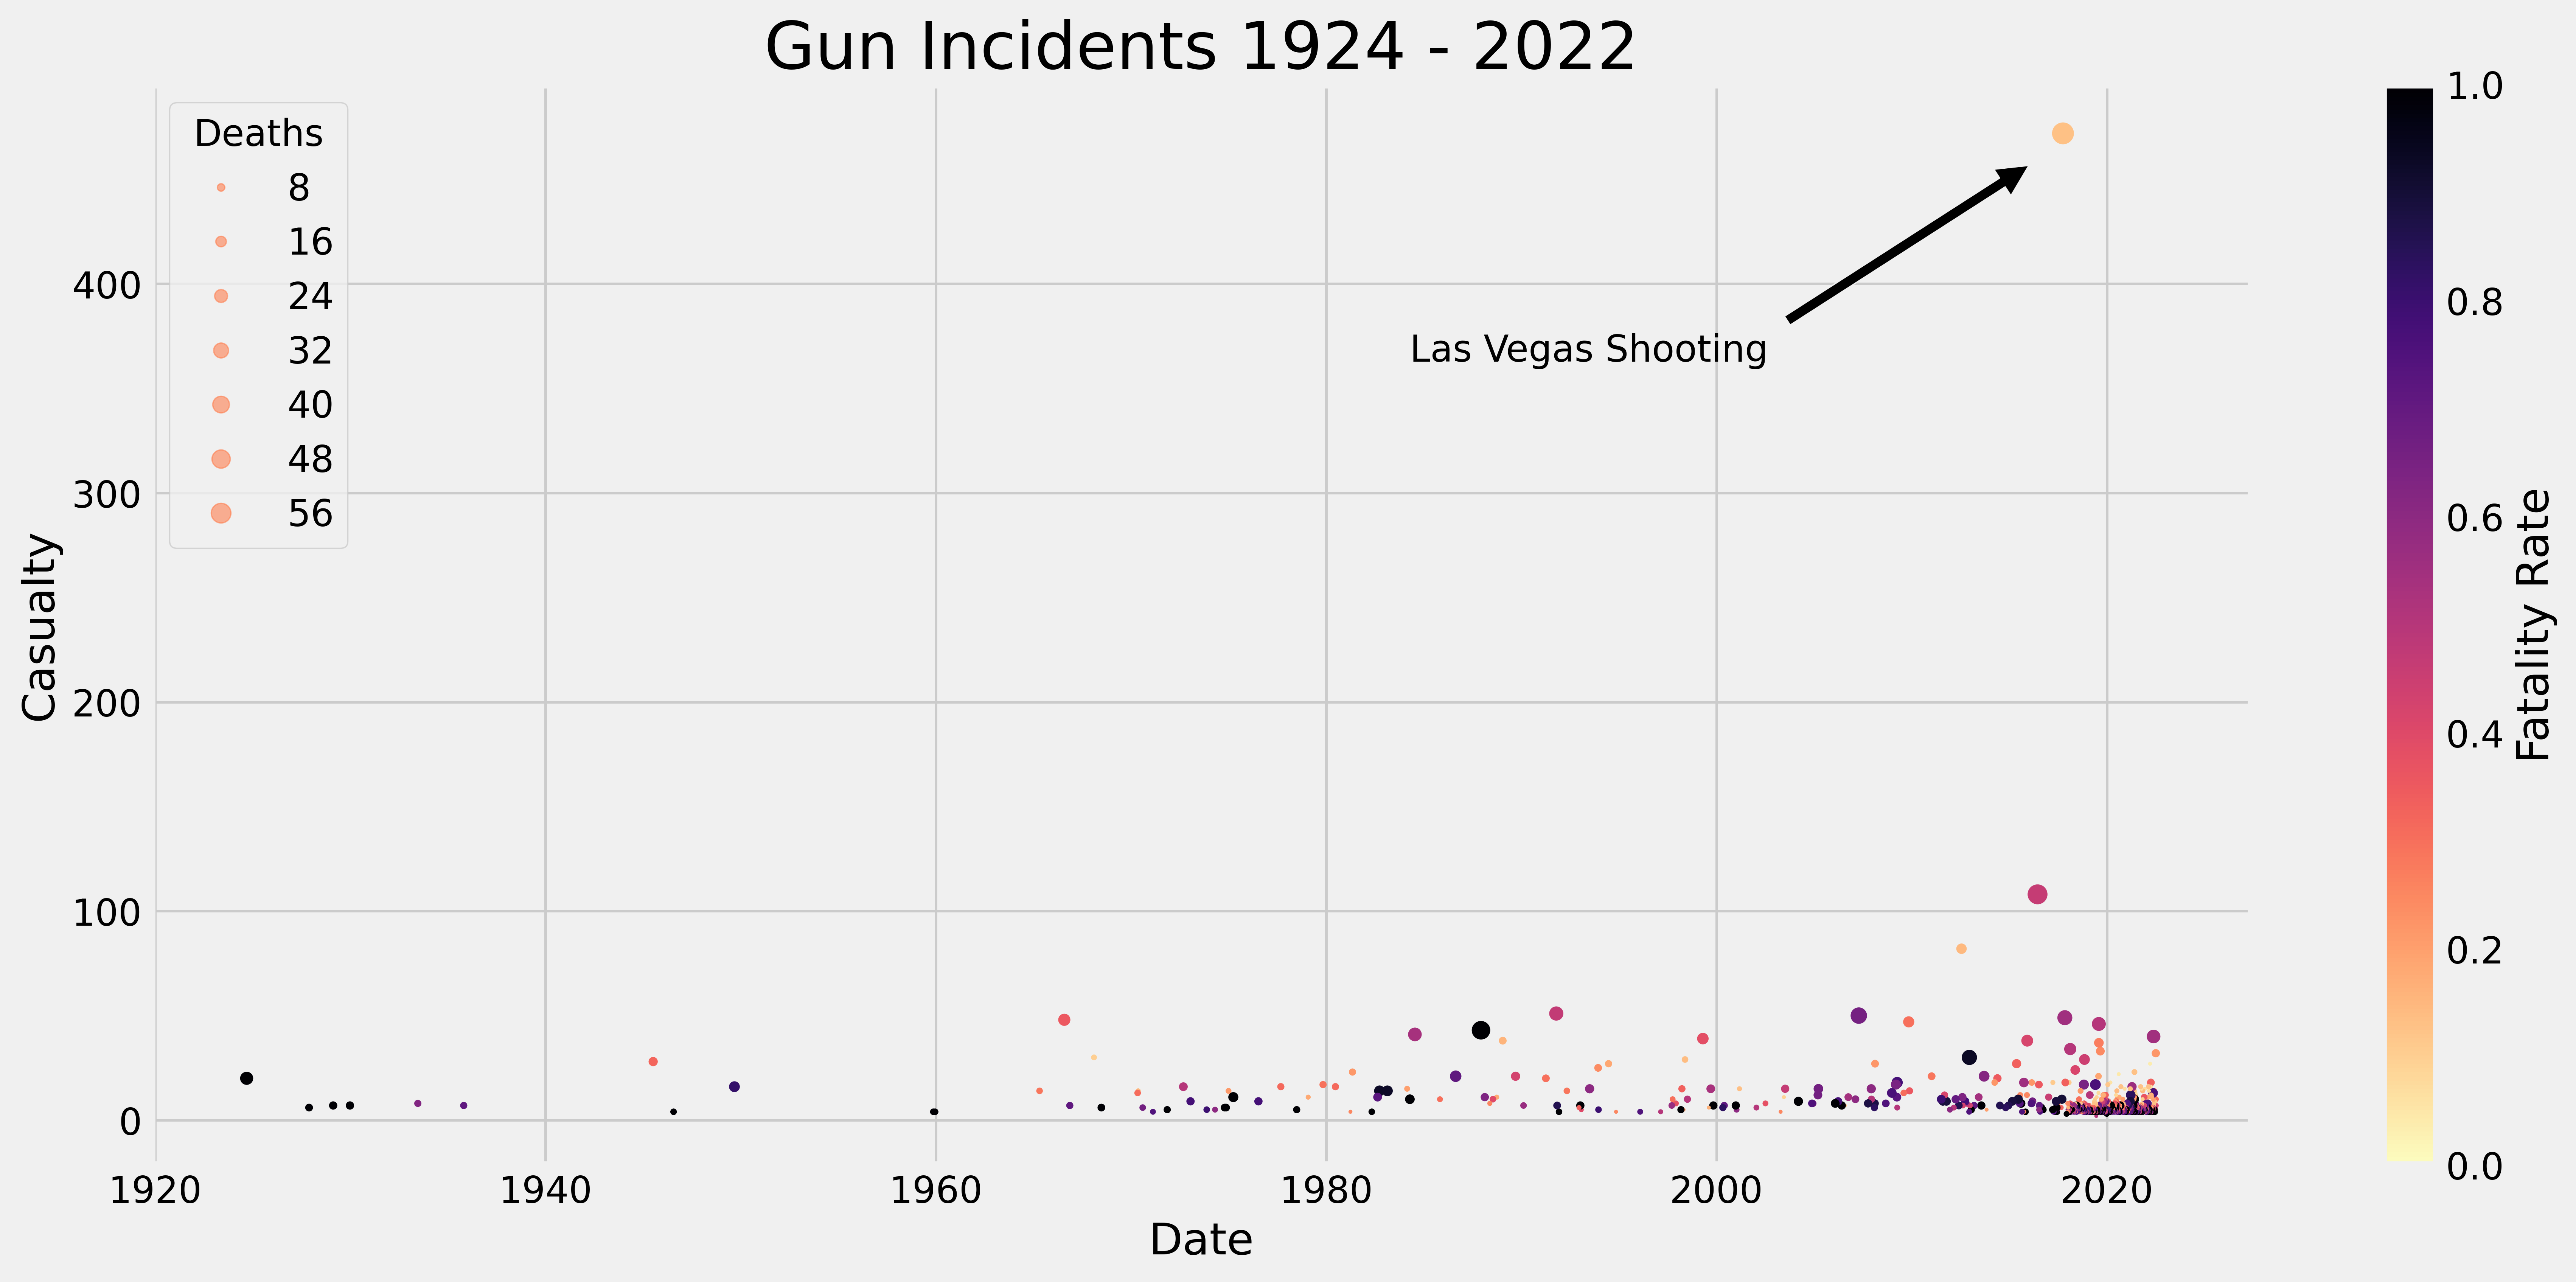

In [16]:
#scatter plot: date - total, size represents be number of deaths while color represents fatality rate

fig, ax = plt.subplots(figsize = (15,7), dpi = 500)

scatter = ax.scatter(data['Date'], data['Total'], c = data['Fatality Rate'], cmap= 'magma_r', s = data['Dead'], label = 'Fatality' )
fig.colorbar(scatter, ax = ax, label = 'Fatality Rate')
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, color = 'Coral')
legend2 = ax.legend(handles, labels, loc="upper left", title="Deaths")
ax.annotate('Las Vegas Shooting', xy=(0.72, 0.85),  xycoords='figure fraction',
            xytext=(0.77, 0.77), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

plt.title('Gun Incidents 1924 - 2022', fontdict = title_font)
ax.set_xlabel('Date')
ax.set_ylabel ('Casualty')
plt.tight_layout()

plt.show()


In [17]:
#the proportion of data after 2009
len(data[(data['year'] >= 2010) & (data['year'] <= 2022)]) /len(data['year'])

0.9531545145447676

## Failed Attempts

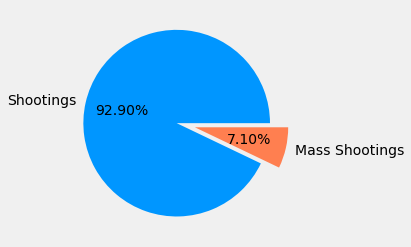

In [18]:
#checking the proportion of mass shootings
shootings = data[data['Dead'] <= 4]
mass_shootings = data[data['Dead'] >= 5]

plt.pie([len(shootings), len(mass_shootings)], explode = [0, 0.2], labels = ['Shootings', 'Mass Shootings'], colors = ['#0096FF', 'Coral'], autopct= '%.2f%%')
plt.show()

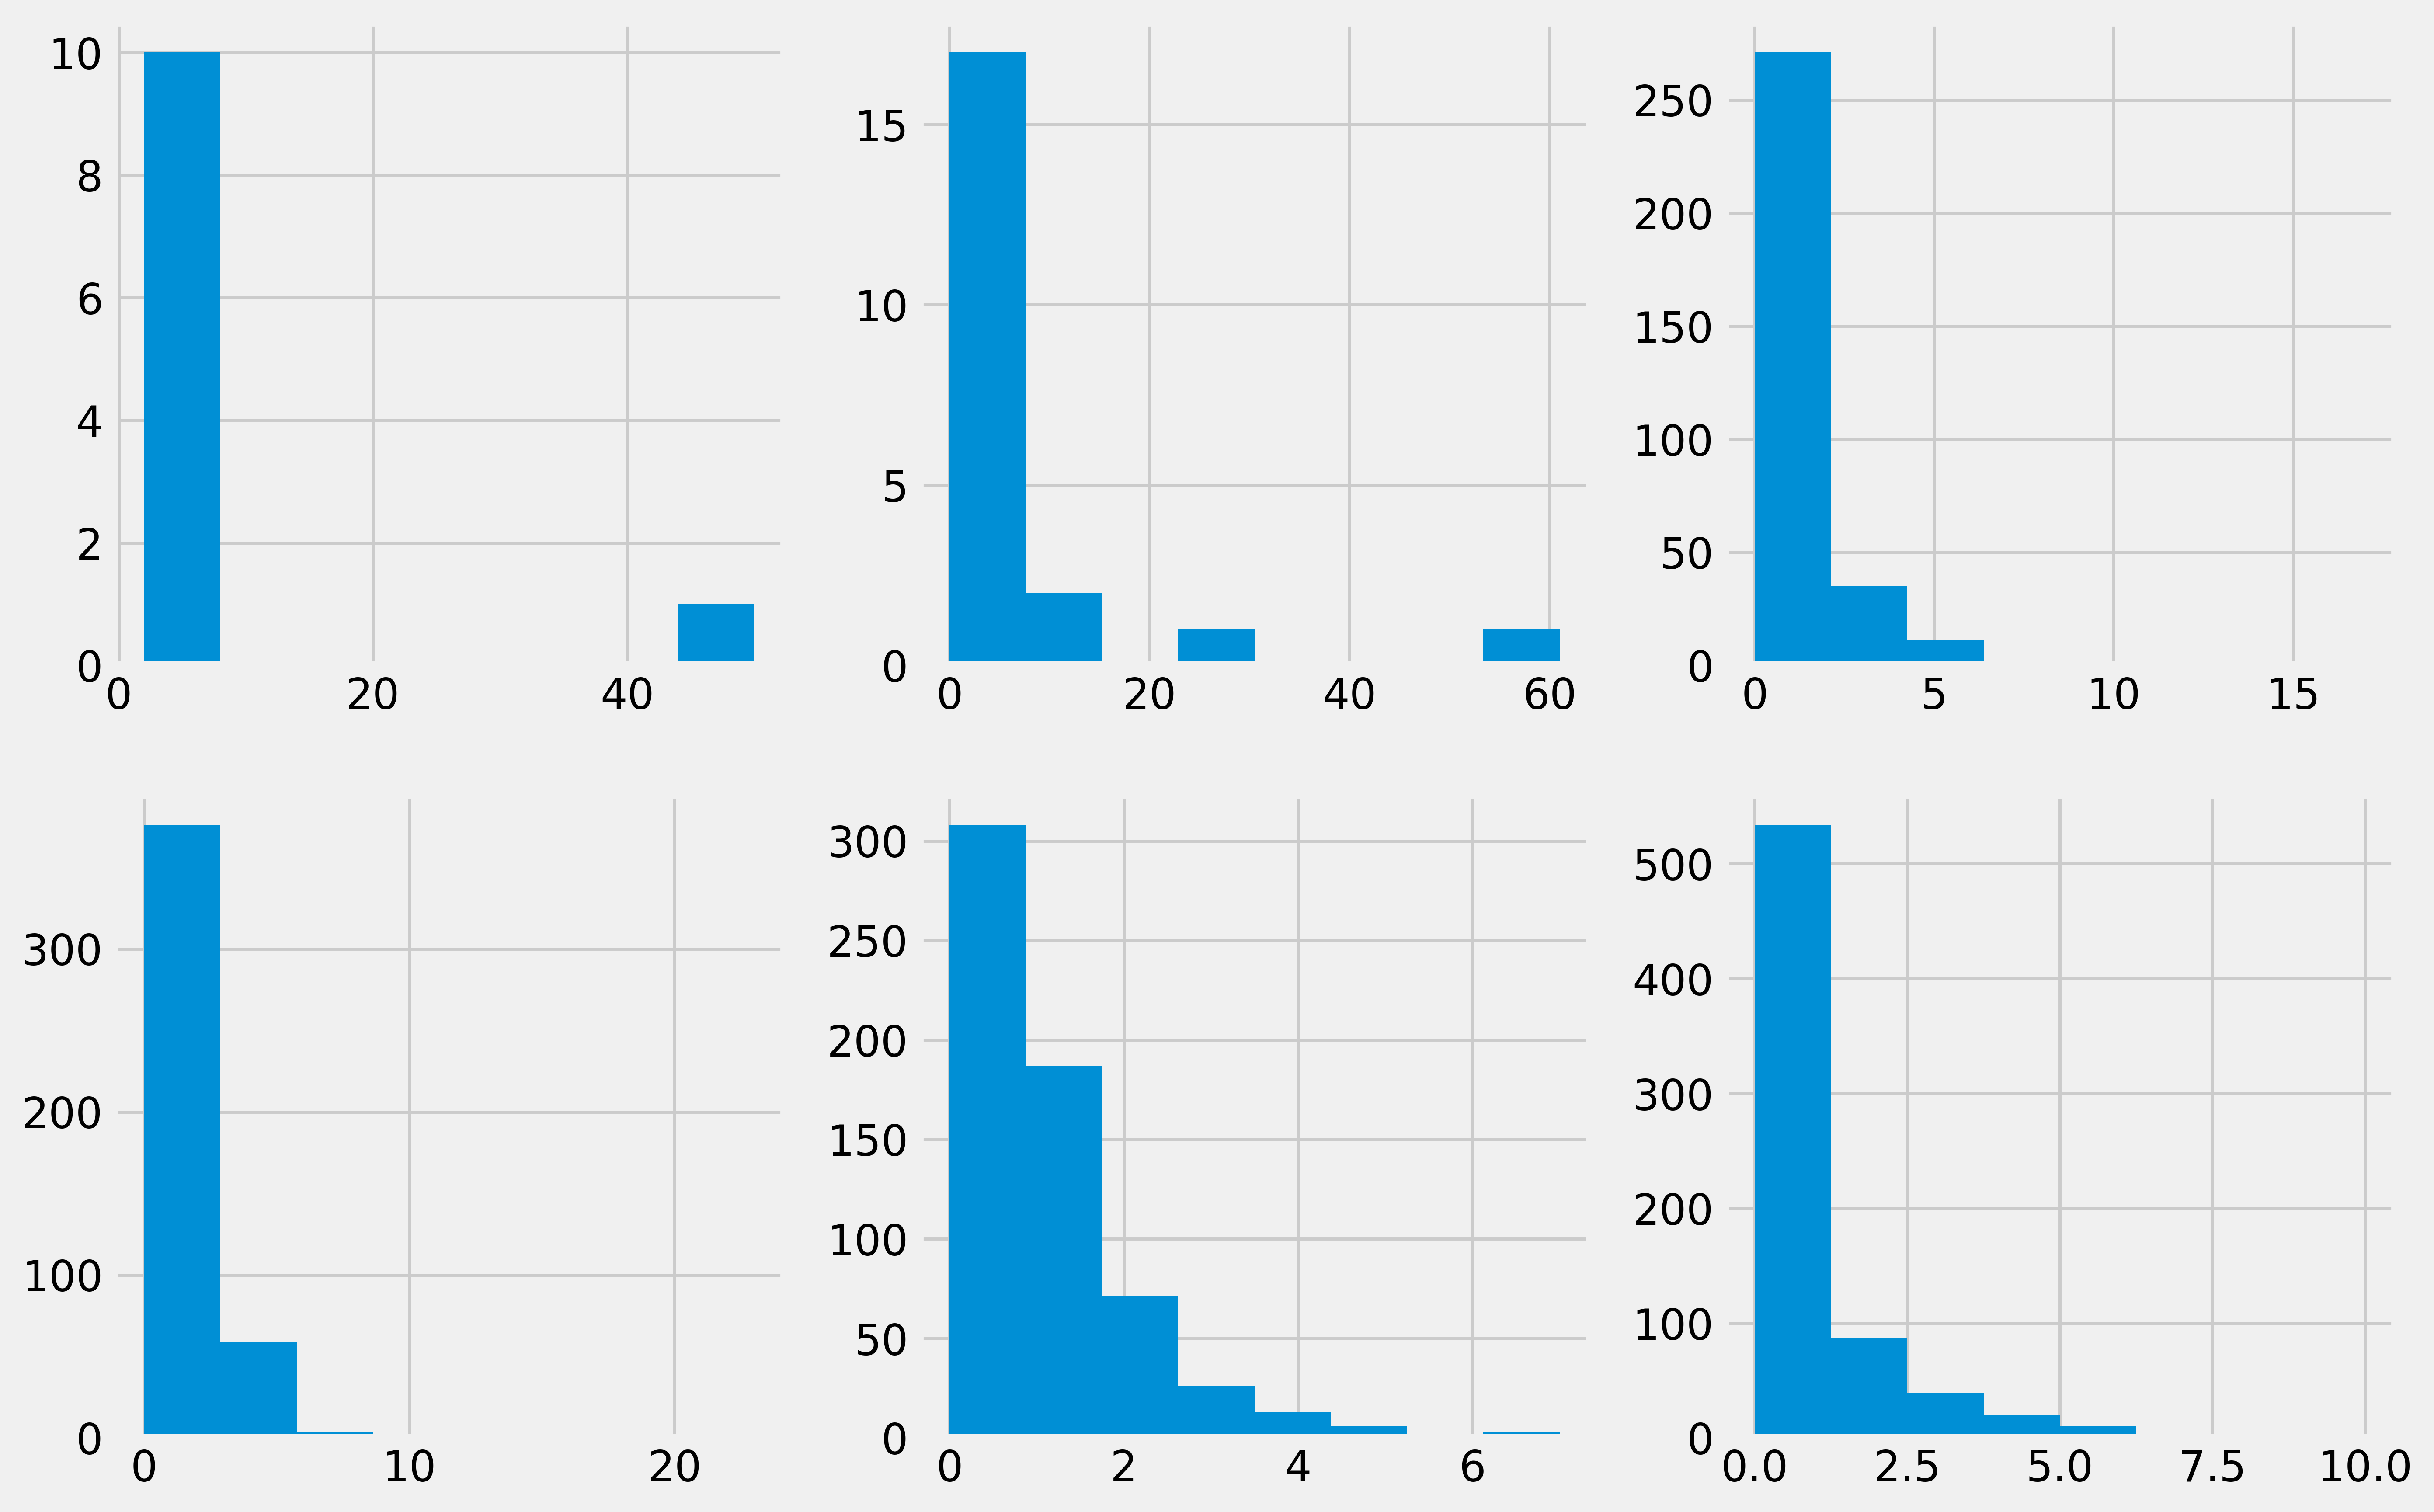

In [19]:
# see if shootings become more deadly over the years (I could not interpret these plots)
from locale import normalize


shooting_2016 = data['Dead'][data['year'] == 2016]
shooting_2017 = data['Dead'][data['year'] == 2017]
shooting_2018 = data['Dead'][data['year'] == 2018]
shooting_2019 = data['Dead'][data['year'] == 2019]
shooting_2020 = data['Dead'][data['year'] == 2020]
shooting_2021 = data['Dead'][data['year'] == 2021]

fig_hist, ax_hist = plt.subplots(2,3, figsize = (12,8), dpi = 500)

ax_hist[0,0].hist(shooting_2016, bins = 8)
ax_hist[0,1].hist(shooting_2017, bins = 8)
ax_hist[0,2].hist(shooting_2018, bins = 8)
ax_hist[1,0].hist(shooting_2019, bins = 8)
ax_hist[1,1].hist(shooting_2020, bins = 8)
ax_hist[1,2].hist(shooting_2021, bins = 8)

plt.show()
